In [1]:
import pandas as pd
import numpy as np
import pylab 
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
isee_machine = pd.read_csv('./data/isee_machine_middel_NG_enc.csv') # 가동 중 데이터

In [6]:
isee_machine['NG_Label'] = isee_machine['NG']+isee_machine['NG5']

In [7]:
isee_machine.columns

Index(['ModuleCount', 'creationTime', 'CycleTime', 'VpPosition', 'VpTime',
       'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
       'Zone1', 'Zone2', 'Zone3', 'Zone4', 'creationDate', 'creationHour',
       'YM', 'creationTime_diff', 'CycleNum', 'Operation_label',
       'Qua_Match_YN', 'NG', 'NG5', 'encoding', 'ProductNum', 'NG_Label'],
      dtype='object')

In [8]:
feature_df = isee_machine[[ 'CycleTime', 'VpPosition', 'VpTime',
       'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
       'Zone1', 'Zone2', 'Zone3', 'Zone4']]

scaled_X = RobustScaler().fit_transform(feature_df)
scaled_df = pd.DataFrame(scaled_X, columns=feature_df.columns)
scaled_df = pd.concat([scaled_df, isee_machine[['CycleNum','NG_Label','ProductNum']]], axis=1)

In [9]:
col_list= feature_df.columns

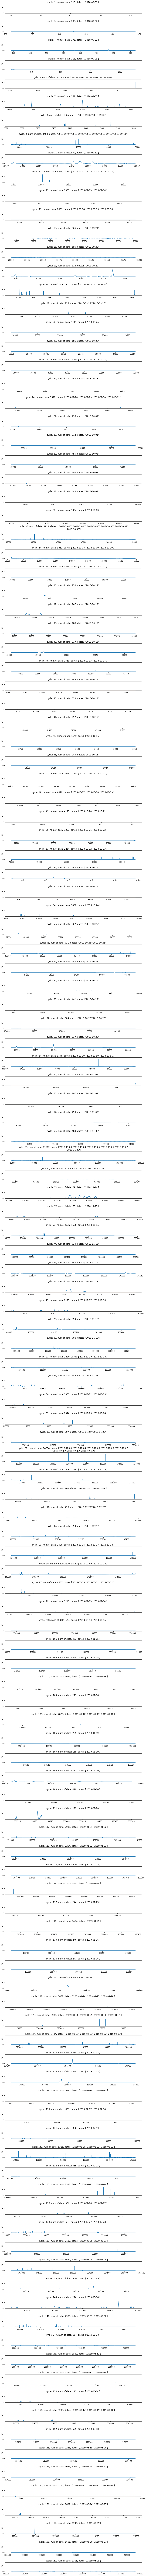

In [18]:
for col in scaled_df.columns:
    plt.figure()
    plt.rcParams["figure.figsize"] = (14,270)
    miny = scaled_df[col].min()
    maxy = scaled_df[col].max()
       
    plt.subplots_adjust(hspace = 1, wspace = 0.3)

    uniq_cycle = scaled_df['CycleNum'].unique()
    num_cycle = len(uniq_cycle)
    w= 1 # subplot 가로 개수
    h = np.ceil(num_cycle/w)  # subplot 세로 개수
    i=1

    for cycle in uniq_cycle:     
        df = scaled_df[scaled_df['CycleNum']==cycle]
        plt.subplot(h,w,i)
        plt.plot(df[col])
        plt.ylim([miny*0.9, maxy*1.1])
        plt.title('cycle: '+str(int(cycle)) + ', num of data: '+ str(int(len(df)))+ ', dates: '+ str(np.unique(df['creationDate'])))
        i+=1
    plt.show()
    break
    #plt.savefig('./output/column_graphs/'+str(col)+'.png')
    print(col, ' 완료!!!!!!')

In [17]:
n_col

17

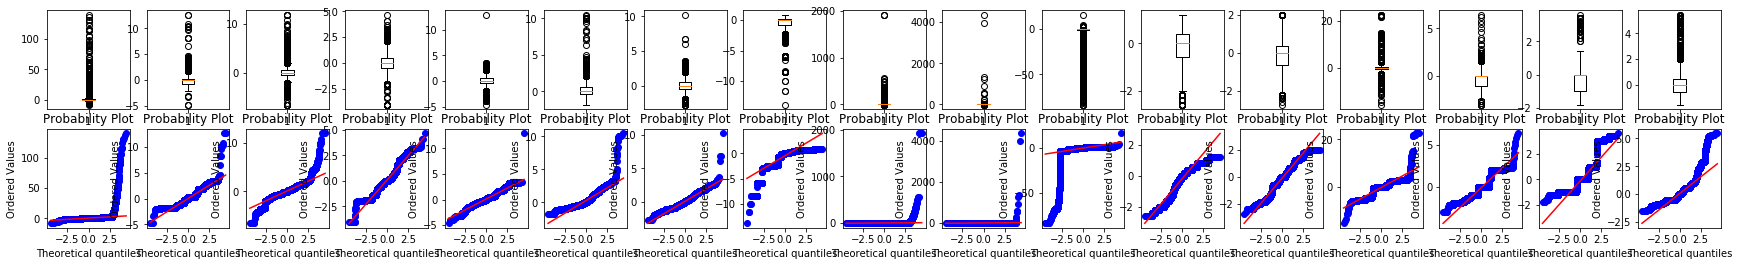

In [19]:
from scipy.stats import probplot

n_col = scaled_X.shape[1]

f, axes = plt.subplots(2, n_col, figsize=(30,4))
for x in range(n_col):
    axes[0][x].boxplot(scaled_X[:,x])
    probplot(scaled_X[:,x], dist="norm", plot=axes[1][x])
pylab.show()

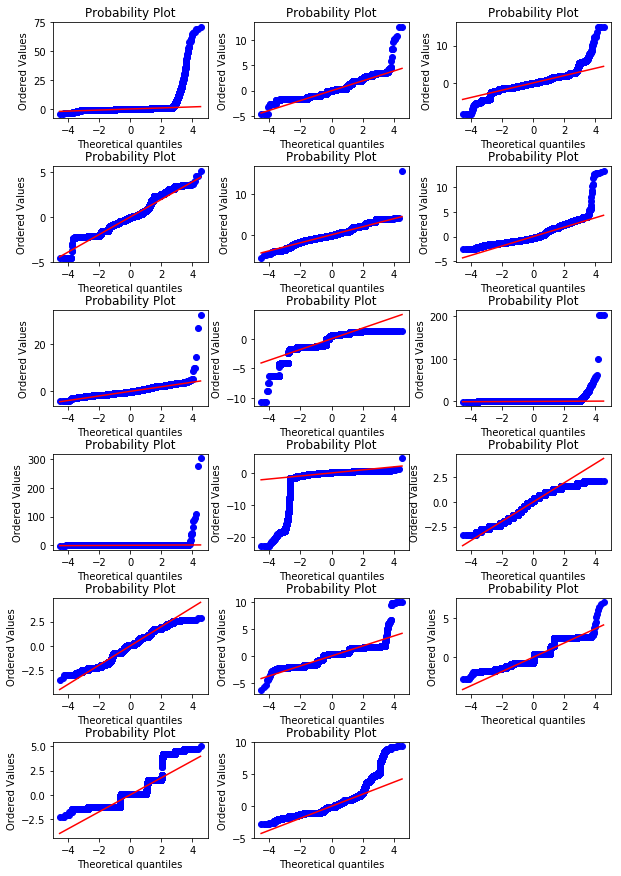

In [54]:
fig = plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
n_col = scaled_df.shape[1]
for x in range(n_col):
    ax = fig.add_subplot(6,3, x+1)
    stats.probplot(scaled_df[x], dist="norm", plot=pylab)
pylab.show()

NameError: name 'use_col' is not defined

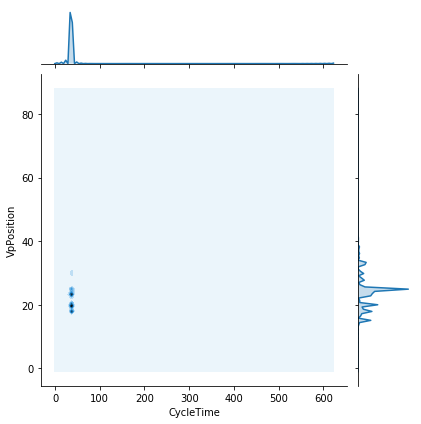

In [21]:
### 매우 매우 오래걸림...
sns.jointplot(x=col_list[0], y=col_list[1], data=isee_machine, kind="kde")
plt.title(col_list[0]+"& "+col_list[1]+"'s Joint Plot, Kernel Density Plot")
plt.show()

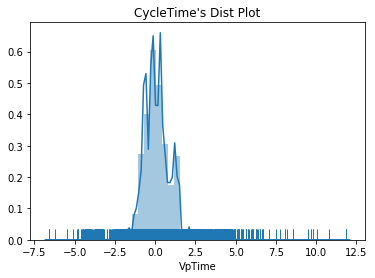

In [71]:
plt.figure()
#plt.rcParams["figure.figsize"]=(10,10)
sns.distplot(scaled_df[col_list[2]], kde=True, rug=True)
plt.title(col_list[0]+"\'s Dist Plot")
plt.show()

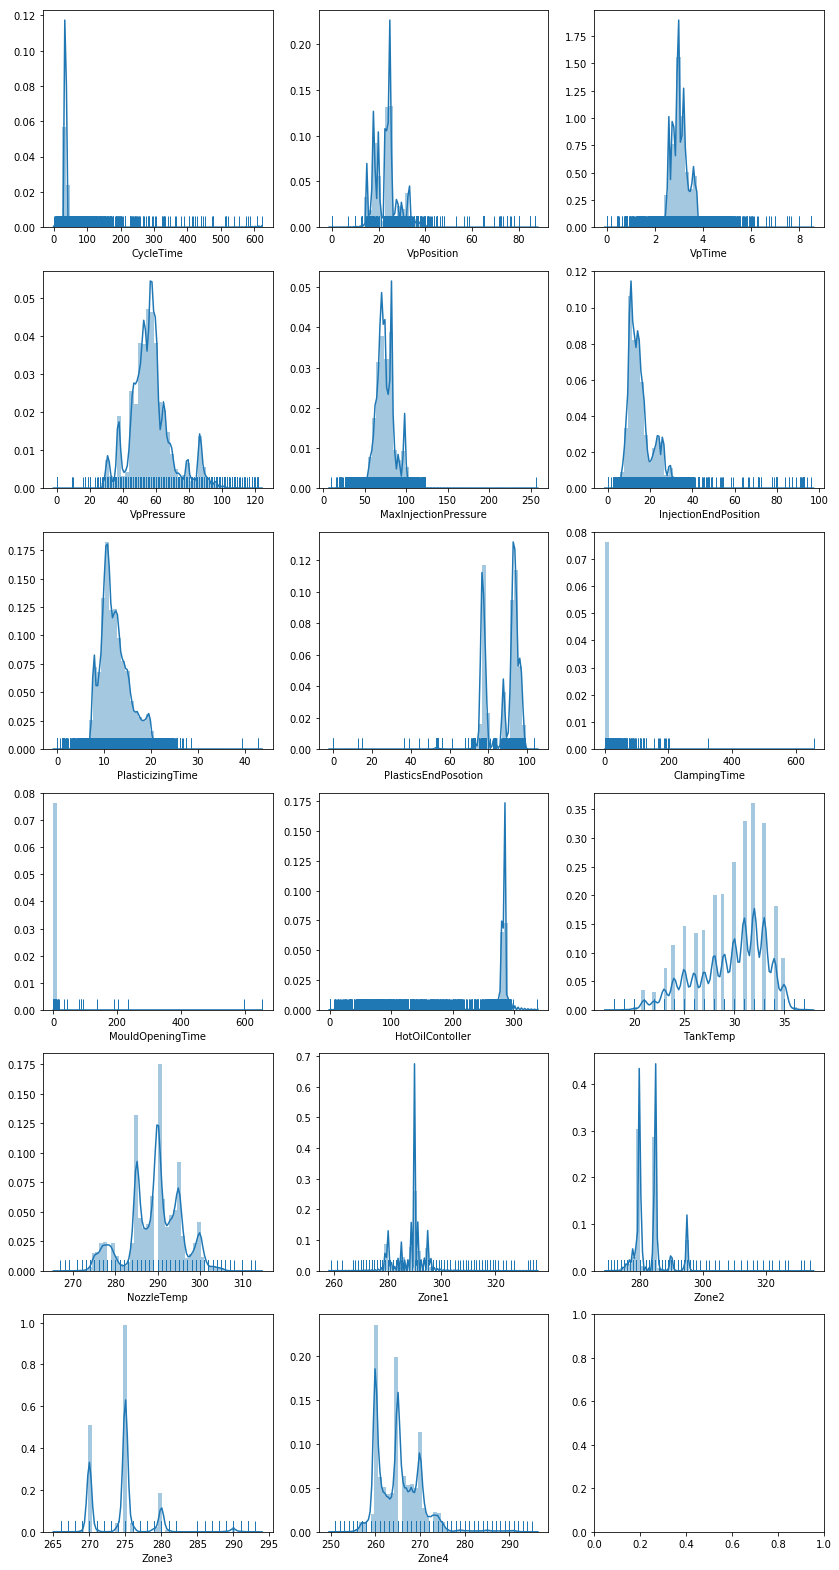

In [61]:
# 전체 데이터 분포 파악

size_graph = len(analy_col)
w = 3
h = int(np.ceil(size_graph/w))
fig, ax = plt.subplots(h,w, figsize=(14,28))

for i, col in enumerate(analy_col):      
    sns.distplot(isee_machine_operation[col],ax=ax[i//w][i%w] , kde=True, rug=True)
    #plt.title(col+"\'s Dist Plot")
plt.show()

#### 수동으로 정규화 변환

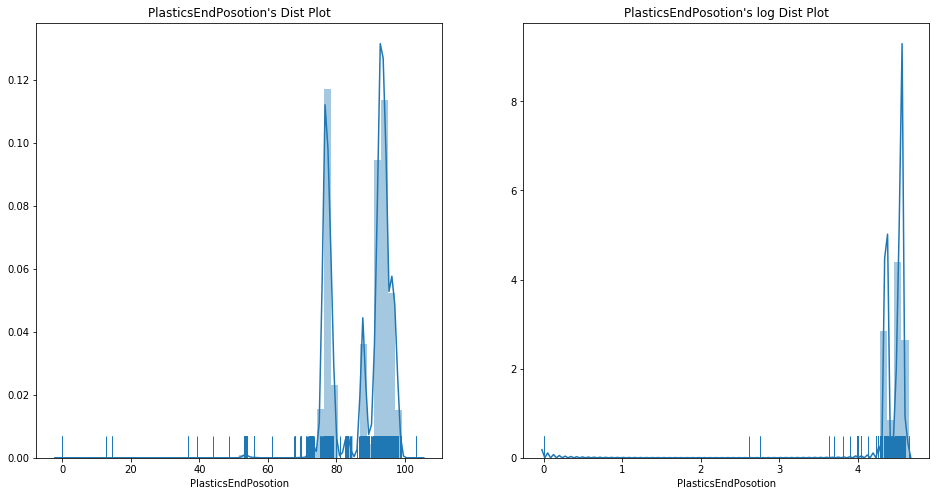

In [7]:
target_col = 'PlasticsEndPosotion'

fig = plt.figure(figsize=(16,8))
#plt.rcParams["figure.figsize"]=(10,10)

ax1 = fig.add_subplot(1,2,1)
sns.distplot(isee_machine_operation[target_col], kde=True, rug=True)
plt.title(target_col+"\'s Dist Plot")

ax2 = fig.add_subplot(1,2,2)
sns.distplot(np.log(isee_machine_operation[target_col]+1), kde=True, rug=True)
plt.title(target_col+"\'s log Dist Plot")

plt.show()

## Map data to a normal distribution

In [22]:
from sklearn.preprocessing import QuantileTransformer
#from sklearn.preprocessing import PowerTransformer

In [23]:
qt = QuantileTransformer(output_distribution='normal', random_state=2019)
#bc = PowerTransformer(method='box-cox')

In [26]:
X_trans_qt = qt.fit_transform(feature_df)
#X_trans_bc = bc.fit_transform(feature_df.values.reshape(-1,1))

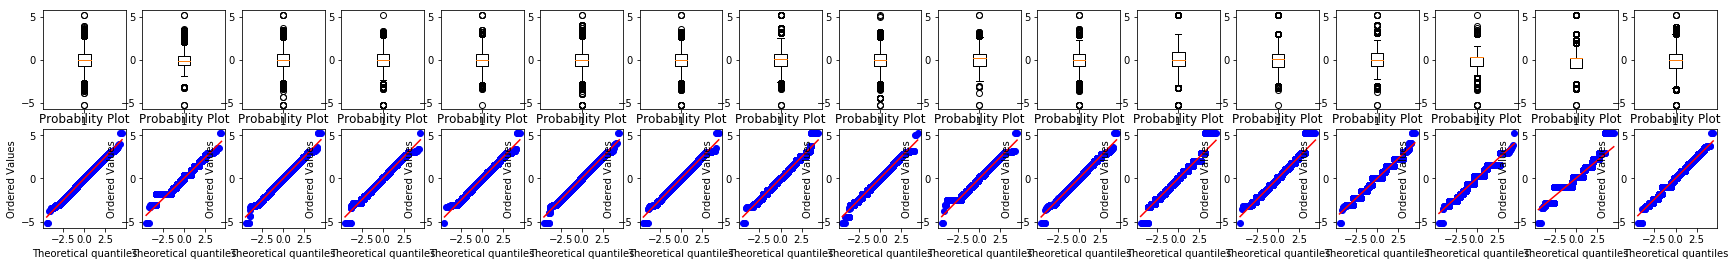

In [34]:
from scipy.stats import probplot

n_col = X_trans_qt.shape[1]

f, axes = plt.subplots(2, n_col, figsize=(30,4))
for x in range(n_col):
    axes[0][x].boxplot(X_trans_qt[:,x])
    probplot(X_trans_qt[:,x], dist="norm", plot=axes[1][x])
pylab.show()

In [27]:
qt_df = pd.DataFrame(X_trans_qt, columns=feature_df.columns)

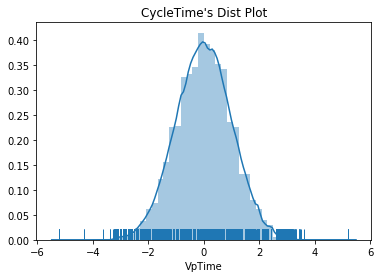

In [70]:
plt.figure()
#plt.rcParams["figure.figsize"]=(10,10)
sns.distplot(qt_df[col_list[2]], kde=True, rug=True)
plt.title(col_list[0]+"\'s Dist Plot")
plt.show()

In [80]:
qt_df = pd.concat([qt_df,isee_machine[['ModuleCount', 'creationTime','creationDate', 'creationHour',
       'YM', 'creationTime_diff', 'CycleNum', 'Operation_label',
       'Qua_Match_YN', 'NG', 'NG5', 'OrderNum', 'ProductNum', 'ProductName',
       'ModelNum', 'cycle', '工單號', '模號',
       'NG_Label']]], axis=1)

In [81]:
#qt_df.to_csv('./data/isee_machine_middel_NG_qt.csv', index=False)